In [1]:
!pip install openai

     |████████████████████████████████| 163kB 8.4MB/s 
  Created wheel for openai: filename=openai-0.2.4-cp36-none-any.whl size=170709 sha256=7d8dd1fd8f27ae398961666519a46af67ea9c925b960cd786d619c7f6da3bc54
  Stored in directory: /root/.cache/pip/wheels/74/96/c8/c6e170929c276b836613e1b9985343b501fe455e53d85e7d48
Successfully built openai


In [1]:
import json
import openai
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
#with open('GPT_SECRET_KEY.json') as f:
   # data = json.load(f)

In [4]:
from gpt import GPT
from gpt import Example

In [5]:
gpt = GPT(engine="davinci",
          temperature=0.5,
          max_tokens=100)

In [5]:
df = pd.DataFrame({"Gender": ["boy", "boy", "boy", "boy", "boy",
                         "girl", "girl", "girl", "girl"],
                   "Division": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "Marks": [50, 55, 67, 85, 44, 84, 65, 56, 87]})

In [6]:
df

,Gender,Division,Marks
0,boy,one,50
1,boy,one,55
2,boy,one,67
3,boy,two,85
4,boy,two,44
5,girl,one,84
6,girl,one,65
7,girl,two,56
8,girl,two,87


# Adding Examples for GPT Model

In [7]:
gpt.add_example(Example('How many unique values in Division Column?', 
                        'df["Division"].nunique()'))

In [8]:
gpt.add_example(Example('Find the Division of boy who scored 55 marks', 
                        'df.loc[(df.loc[:, "Gender"] == "boy") & (df.loc[:, "Marks"] == 55), "Division"]'))

In [9]:
gpt.add_example(Example('Find the average Marks scored by Girls', 
                        'np.mean(df.loc[(df.loc[:, "Gender"] == "girl"), "Marks"])'))

# Example 1

In [10]:
prompt = "Display Division of girl who scored maximum marks"

In [ ]:
gpt.get_top_reply(prompt)

In [ ]:
response = gpt.get_top_reply(prompt)
print(response)
modified_response = response.split("output: ")[-1].strip('\n')
eval(modified_response)

# Example 2

In [16]:
prompt = "Find the median Marks scored by Boys"

In [17]:
response = gpt.get_top_reply(prompt)
print(response)
modified_response = response.split("output: ")[-1].strip('\n')
eval(modified_response)

output: np.median(df.loc[(df.loc[:, "Gender"] == "boy"), "Marks"])



55.0

# Matplotlib

In [18]:
df = pd.read_csv("iris.csv")

In [19]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
gpt.add_example(Example('Plot Scatter Plot between Sepal Length & Sepal Width', 
                        "plt.scatter(df['sepal_length'], df['sepal_width'])"))

In [21]:
gpt.add_example(Example('Plot Bar Plot of Species', 
                        "sns.countplot('species',data=df)"))

In [22]:
gpt.add_example(Example('Plot a Joint Plot between Sepal Length & Petal Length', 
                        "sns.jointplot(x='sepal_length',y='petal_length',data=df)"))

In [23]:
gpt.add_example(Example('Show me the histogram of Petal Length', 
                        "plt.hist(df['petal_length'])"))

# Example 3

In [24]:
prompt = "Show me the scatter plot between petal length and sepal width"

output: plt.scatter(df['sepal_length'], df['petal_length'])



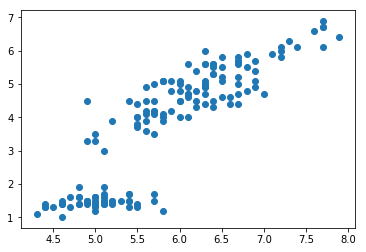

In [25]:
response = gpt.get_top_reply(prompt)
print(response)
modified_response = response.split("output: ")[-1].strip('\n')
eval(modified_response)

# Example 4

In [26]:
prompt = "Show me the Joint Plot between Petal Length & Petal Length"

output: sns.jointplot(x='petal_length',y='petal_length',data=df)



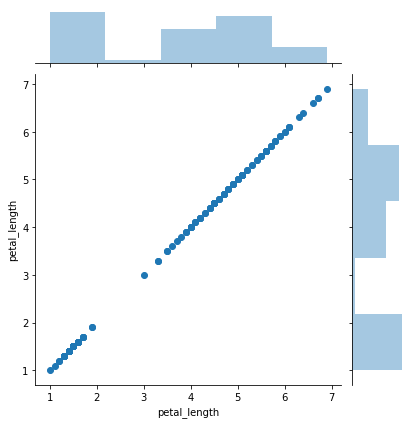

In [27]:
response = gpt.get_top_reply(prompt)
print(response)
modified_response = response.split("output: ")[-1].strip('\n')
eval(modified_response)

# Example 5

In [28]:
prompt = "Show me the Distribution of Sepal Length"

output: plt.hist(df['sepal_length'],bins=50)



(array([ 1.,  3.,  1.,  0.,  4.,  2.,  5.,  0.,  6., 10.,  0.,  9.,  4.,
         1.,  0.,  6.,  7.,  0.,  6.,  8.,  7.,  0.,  3.,  6.,  0.,  6.,
         4.,  9.,  0.,  7.,  5.,  2.,  0.,  8.,  3.,  0.,  4.,  1.,  1.,
         0.,  3.,  1.,  0.,  1.,  0.,  1.,  0.,  4.,  0.,  1.]),
 array([4.3  , 4.372, 4.444, 4.516, 4.588, 4.66 , 4.732, 4.804, 4.876,
        4.948, 5.02 , 5.092, 5.164, 5.236, 5.308, 5.38 , 5.452, 5.524,
        5.596, 5.668, 5.74 , 5.812, 5.884, 5.956, 6.028, 6.1  , 6.172,
        6.244, 6.316, 6.388, 6.46 , 6.532, 6.604, 6.676, 6.748, 6.82 ,
        6.892, 6.964, 7.036, 7.108, 7.18 , 7.252, 7.324, 7.396, 7.468,
        7.54 , 7.612, 7.684, 7.756, 7.828, 7.9  ]),
 <a list of 50 Patch objects>)

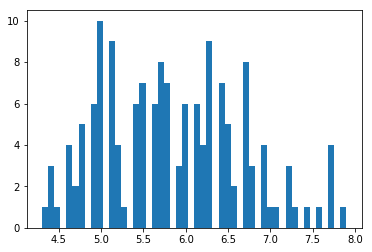

In [29]:
response = gpt.get_top_reply(prompt)
print(response)
modified_response = response.split("output: ")[-1].strip('\n')
eval(modified_response)